===== SALES PERFORMANCE REPORT - APRIL 2025 =====
Data loaded successfully from C:/Users/hp/Downloads/all (1).xlsx

--- 1. CUSTOMER TYPE REVENUE ANALYSIS ---

--- 2. SMB CHANNEL PERFORMANCE ---

=== CHANNEL PERFORMANCE SUMMARY ===
 Channel_Group Revenue($) Percentage
Other Channels $51,301.66      43.5%
      Econocom $31,858.70      27.0%
        Orange $14,735.03      12.5%
        HELIAQ $13,455.86      11.4%
         Inmac  $5,033.13       4.3%
           SFR  $1,648.60       1.4%

--- 3. KNOX SW PRODUCT ANALYSIS ---


ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

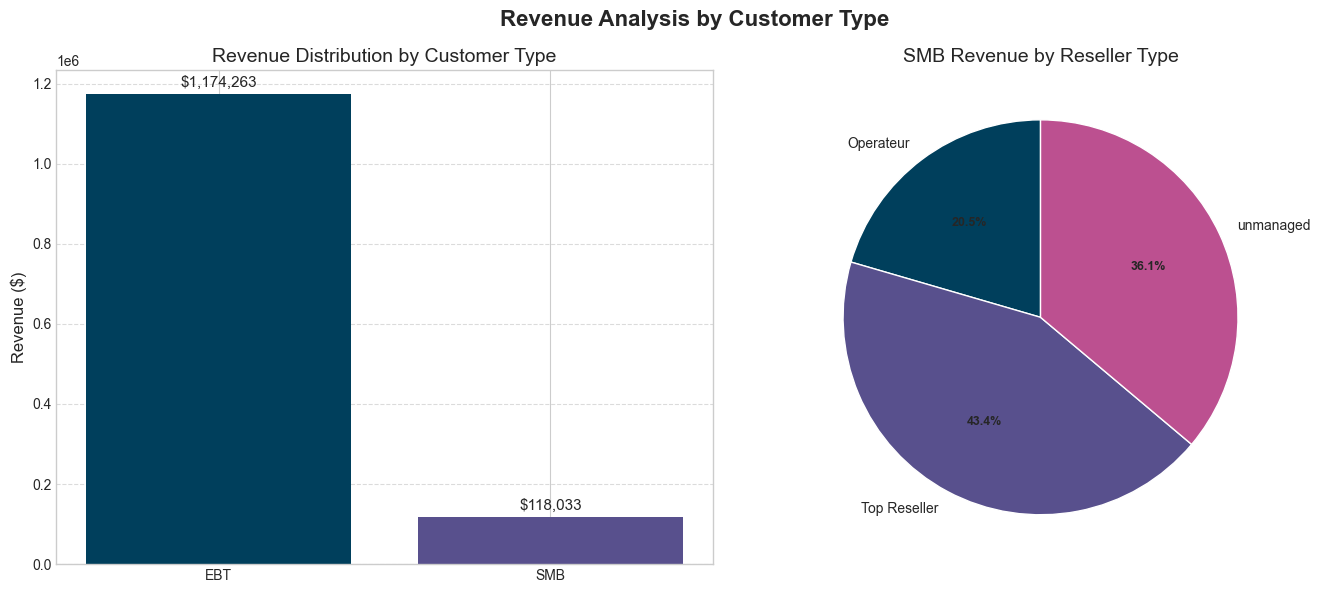

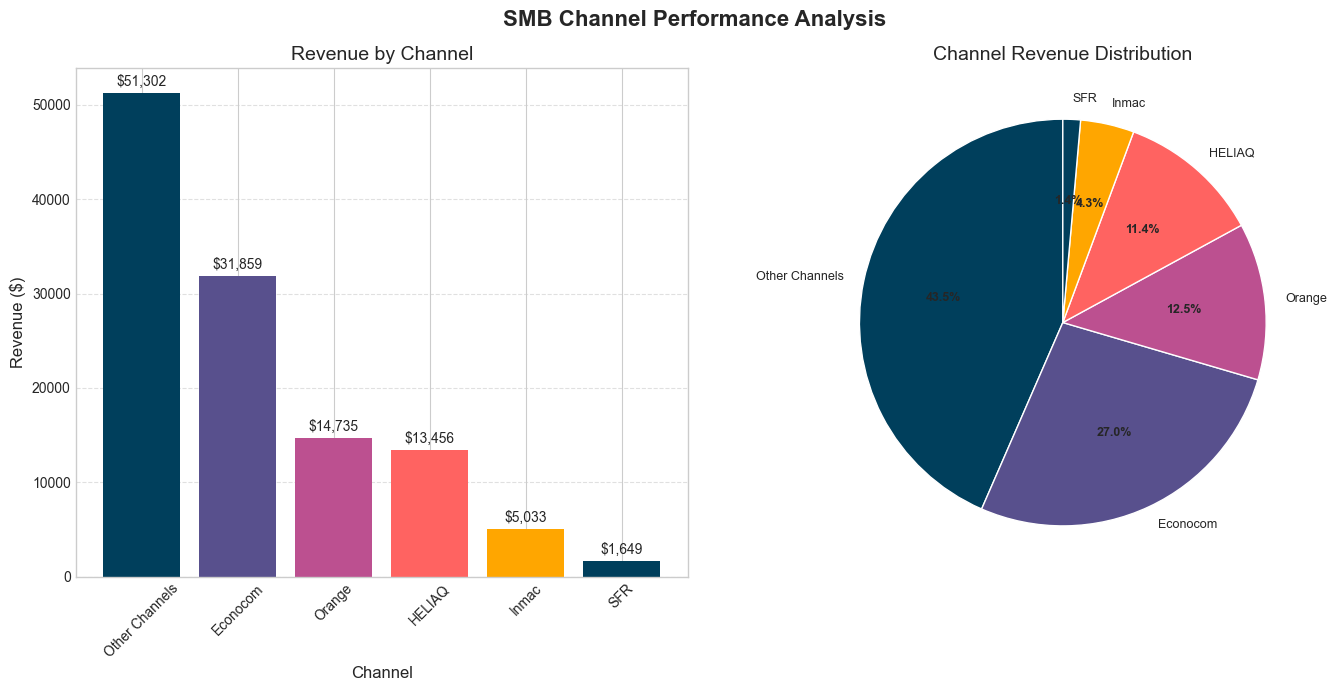

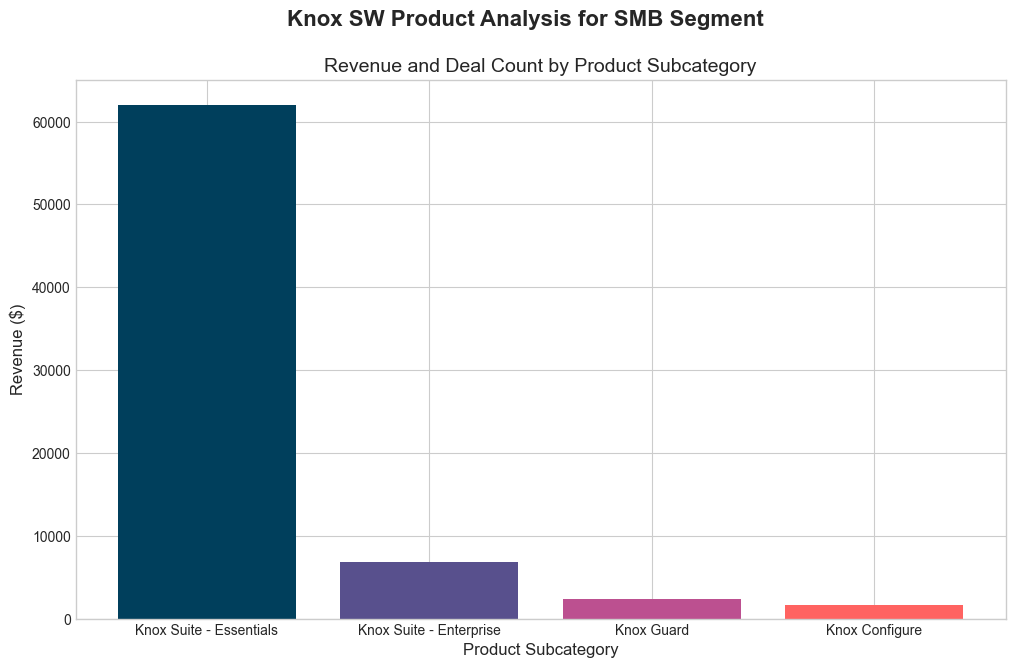

In [6]:
# Sales Performance Report - April 2025
# Imports and setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Set consistent style for all visualizations
plt.style.use('seaborn-v0_8-whitegrid')
COLORS = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# Function to load and clean data
def load_data(file_path):
    """Load and clean data from Excel file"""
    try:
        df = pd.read_excel(file_path)
        print(f"Data loaded successfully from {file_path}")
        
        # Clean column names
        df.columns = df.columns.str.strip()
        
        # Basic data validation
        required_columns = ['Customer Typ', 'Revenue($)']
        for col in required_columns:
            if col not in df.columns:
                print(f"Warning: Required column '{col}' not found in dataset")
                
        return df
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return pd.DataFrame()

# 1. Revenue Analysis by Customer Type
def analyze_customer_revenue(df):
    """Analyze and visualize revenue by customer type"""
    if 'Customer Typ' not in df.columns or 'Revenue($)' not in df.columns:
        print("Cannot analyze customer revenue: missing required columns")
        return
    
    # Calculate revenues
    total_revenue = df['Revenue($)'].sum()
    revenue_by_type = df.groupby('Customer Typ')['Revenue($)'].sum().reset_index()
    
    # Extract values for EBT and SMB
    ebt_revenue = revenue_by_type[revenue_by_type['Customer Typ'] == 'EBT']['Revenue($)'].sum() if 'EBT' in revenue_by_type['Customer Typ'].values else 0
    smb_revenue = revenue_by_type[revenue_by_type['Customer Typ'] == 'SMB']['Revenue($)'].sum() if 'SMB' in revenue_by_type['Customer Typ'].values else 0
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Revenue Analysis by Customer Type', fontsize=16, fontweight='bold', y=0.98)
    
    # First subplot: Customer Type Revenue Comparison
    bars = ax1.bar(revenue_by_type['Customer Typ'], revenue_by_type['Revenue($)'], color=COLORS[:len(revenue_by_type)])
    ax1.set_title('Revenue Distribution by Customer Type', fontsize=14)
    ax1.set_ylabel('Revenue ($)', fontsize=12)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'${height:,.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=11)
    
    # Second subplot: SMB Revenue Breakdown (if available)
    smb_data = df[df['Customer Typ'] == 'SMB']
    
    if not smb_data.empty and 'Reseller Type' in smb_data.columns:
        reseller_revenue = smb_data.groupby('Reseller Type')['Revenue($)'].sum()
        
        wedges, texts, autotexts = ax2.pie(
            reseller_revenue, 
            labels=reseller_revenue.index,
            autopct='%1.1f%%',
            startangle=90, 
            colors=COLORS[:len(reseller_revenue)],
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
        )
        
        # Customize pie chart appearance
        for autotext in autotexts:
            autotext.set_fontsize(9)
            autotext.set_fontweight('bold')
        
        ax2.set_title('SMB Revenue by Reseller Type', fontsize=14)
    else:
        ax2.text(0.5, 0.5, 'No SMB Reseller data available', 
                 ha='center', va='center', fontsize=12)
        
    plt.tight_layout()
    
    # Return key metrics for the report
    return {
        'total_revenue': total_revenue,
        'ebt_revenue': ebt_revenue,
        'smb_revenue': smb_revenue,
        'ebt_percentage': (ebt_revenue / total_revenue * 100) if total_revenue > 0 else 0,
        'smb_percentage': (smb_revenue / total_revenue * 100) if total_revenue > 0 else 0
    }

# 2. Channel Performance Analysis (focused on SMB)
def analyze_channel_performance(df):
    """Analyze channel performance for SMB customers"""
    if 'Customer Typ' not in df.columns or 'Revenue($)' not in df.columns or 'Channel' not in df.columns:
        print("Cannot analyze channel performance: missing required columns")
        return
    
    # Filter for SMB customers
    smb_data = df[df['Customer Typ'] == 'SMB']
    
    if smb_data.empty:
        print("No SMB data available for channel analysis")
        return
    
    # Define important channels to track separately
    key_channels = ['HELIAQ', 'Inmac', 'Econocom', 'Computacenter', 'Orange', 'Bouygues', 'SFR']
    
    # Create grouped channel column
    smb_data['Channel_Group'] = np.where(smb_data['Channel'].isin(key_channels), 
                                       smb_data['Channel'], 
                                       'Other Channels')
    
    # Calculate revenue by channel
    channel_revenue = smb_data.groupby('Channel_Group')['Revenue($)'].sum().reset_index()
    channel_revenue = channel_revenue.sort_values('Revenue($)', ascending=False)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle('SMB Channel Performance Analysis', fontsize=16, fontweight='bold', y=0.98)
    
    # Bar chart
    custom_colors = COLORS[:len(channel_revenue)]
    bars = ax1.bar(channel_revenue['Channel_Group'], 
                  channel_revenue['Revenue($)'],
                  color=custom_colors)
    
    ax1.set_title('Revenue by Channel', fontsize=14)
    ax1.set_xlabel('Channel', fontsize=12)
    ax1.set_ylabel('Revenue ($)', fontsize=12)
    ax1.tick_params(axis='x', rotation=45, labelsize=10)
    ax1.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'${height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)
    
    # Pie chart
    wedges, texts, autotexts = ax2.pie(
        channel_revenue['Revenue($)'],
        labels=channel_revenue['Channel_Group'],
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 9}
    )
    
    # Customize pie chart appearance
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_fontweight('bold')
    
    ax2.set_title('Channel Revenue Distribution', fontsize=14)
    
    plt.tight_layout()
    
    # Create channel performance summary table
    print("\n=== CHANNEL PERFORMANCE SUMMARY ===")
    summary_table = channel_revenue.copy()
    summary_table['Percentage'] = summary_table['Revenue($)'] / summary_table['Revenue($)'].sum() * 100
    summary_table['Revenue($)'] = summary_table['Revenue($)'].apply(lambda x: f"${x:,.2f}")
    summary_table['Percentage'] = summary_table['Percentage'].apply(lambda x: f"{x:.1f}%")
    print(summary_table.to_string(index=False))
    
    return channel_revenue

# 3. Product Analysis (Knox SW for SMB)
def analyze_knox_products(df):
    """Analyze Knox SW products sold to SMB customers"""
    if not all(col in df.columns for col in ['Customer Typ', 'Product Type', 'Prod Sub']):
        print("Cannot analyze Knox products: missing required columns")
        return
    
    # Filter for SMB Knox SW data
    smb_knox = df[(df['Customer Typ'] == 'SMB') & (df['Product Type'] == 'Knox SW')].copy()
    
    if smb_knox.empty:
        print("No Knox SW data available for SMB customers")
        return
    
    # Analyze by product subcategory
    prod_sub_counts = smb_knox['Prod Sub'].value_counts().reset_index()
    prod_sub_counts.columns = ['Product Subcategory', 'Number of Deals']
    
    # Calculate revenue by product subcategory
    prod_sub_revenue = smb_knox.groupby('Prod Sub')['Revenue($)'].sum().reset_index()
    prod_sub_revenue.columns = ['Product Subcategory', 'Revenue']
    
    # Merge counts and revenue
    prod_analysis = pd.merge(prod_sub_counts, prod_sub_revenue, on='Product Subcategory')
    prod_analysis = prod_analysis.sort_values('Revenue', ascending=False)
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(12, 7))
    fig.suptitle('Knox SW Product Analysis for SMB Segment', fontsize=16, fontweight='bold', y=0.98)
    
    # Primary y-axis: Revenue
    bars = ax.bar(prod_analysis['Product Subcategory'], 
                 prod_analysis['Revenue'],
                 color=COLORS[:len(prod_analysis)])
    
    ax.set_title('Revenue and Deal Count by Product Subcategory', fontsize=14)
    ax.set_xlabel('Product Subcategory', fontsize=12)
    ax.set_ylabel('Revenue ($)', fontsize=12)
    ax.tick_params(axis='x', rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Add revenue labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'${height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)
    
    # Secondary y-axis: Deal count
    ax2 = ax.twinx()
    line = ax2.plot(prod_analysis['Product Subcategory'], 
                   prod_analysis['Number of Deals'], 
                   'o-', color='#e63946', linewidth=2, markersize=8)
    
    ax2.set_ylabel('Number of Deals', fontsize=12, color='#e63946')
    ax2.tick_params(axis='y', labelcolor='#e63946')
    
    # Add deal count labels
    for i, v in enumerate(prod_analysis['Number of Deals']):
        ax2.annotate(f'{v}',
                     xy=(i, v),
                     xytext=(0, 5),  # 5 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=10, color='#e63946')
    
    plt.tight_layout()
    
    # Display detailed analysis
    print("\n=== KNOX SW PRODUCT ANALYSIS ===")
    display_table = prod_analysis.copy()
    display_table['Revenue'] = display_table['Revenue'].apply(lambda x: f"${x:,.2f}")
    display_table['Avg. Revenue per Deal'] = (prod_analysis['Revenue'] / prod_analysis['Number of Deals']).apply(lambda x: f"${x:,.2f}")
    print(display_table.to_string(index=False))
    
    return prod_analysis

# 4. Sales Pipeline and Forecast Analysis
def forecast_analysis(app_file, pipe_file, conversion_rate=1.10):
    """Analyze existing sales and pipeline to create a forecast"""
    # Load both datasets
    app_data = load_data(app_file)
    pipe_data = load_data(pipe_file)
    
    if app_data.empty or pipe_data.empty:
        print("Cannot perform forecast analysis: missing data")
        return
    
    # Calculate current revenue (app data)
    if 'Customer Typ' in app_data.columns and 'Revenue($)' in app_data.columns:
        smb_app = app_data[app_data['Customer Typ'] == 'SMB']
        current_revenue = smb_app['Revenue($)'].sum()
    else:
        print("Missing columns in app data")
        current_revenue = 0
    
    # Calculate pipeline revenue
    if 'Type end customer' in pipe_data.columns and 'Value (€)' in pipe_data.columns:
        smb_pipe = pipe_data[pipe_data['Type end customer'] == 'SMB']
        pipe_revenue_eur = smb_pipe['Value (€)'].sum()
        pipe_revenue_usd = pipe_revenue_eur * conversion_rate
    else:
        print("Missing columns in pipeline data")
        pipe_revenue_eur = 0
        pipe_revenue_usd = 0
    
    # Calculate weighted pipeline (if probability available)
    if 'Probabilité' in pipe_data.columns:
        # Ensure probability is numeric
        pipe_data['Probabilité'] = pd.to_numeric(pipe_data['Probabilité'], errors='coerce')
        smb_pipe_weighted = pipe_data[pipe_data['Type end customer'] == 'SMB'].copy()
        weighted_revenue_eur = (smb_pipe_weighted['Value (€)'] * smb_pipe_weighted['Probabilité']).sum()
        weighted_revenue_usd = weighted_revenue_eur * conversion_rate
    else:
        weighted_revenue_eur = 0
        weighted_revenue_usd = 0
    
    # Calculate total forecast
    total_forecast_usd = current_revenue + pipe_revenue_usd
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    fig.suptitle('Q2 Sales Forecast Analysis', fontsize=16, fontweight='bold', y=0.98)
    
    # First subplot: Waterfall chart
    categories = ['Current Revenue', 'Pipeline (Expected)', 'Total Forecast']
    values = [current_revenue, pipe_revenue_usd, 0]  # Last value is a placeholder
    
    # Colors for waterfall chart
    colors = ['#003f5c', '#bc5090', '#ffa600']
    
    # Create waterfall chart
    ax1.bar(categories[0], values[0], color=colors[0])
    ax1.bar(categories[1], values[1], bottom=values[0], color=colors[1])
    ax1.bar(categories[2], total_forecast_usd, color=colors[2])
    
    # Add value labels
    ax1.annotate(f"${current_revenue:,.0f}", 
                xy=(0, current_revenue/2), 
                ha='center', va='center',
                fontsize=12, color='white')
    
    ax1.annotate(f"${pipe_revenue_usd:,.0f}", 
                xy=(1, current_revenue + pipe_revenue_usd/2), 
                ha='center', va='center',
                fontsize=12, color='white')
    
    ax1.annotate(f"${total_forecast_usd:,.0f}", 
                xy=(2, total_forecast_usd/2), 
                ha='center', va='center',
                fontsize=12, color='white')
    
    ax1.set_title('Revenue Forecast Composition', fontsize=14)
    ax1.set_ylabel('Revenue ($)', fontsize=12)
    ax1.grid(axis='y', linestyle='--', alpha=0.6)
    ax1.set_ylim(0, total_forecast_usd * 1.2)  # Add some space at the top
    
    # Second subplot: Top 5 pipeline opportunities
    if not smb_pipe.empty:
        top_deals = smb_pipe.nlargest(5, 'Value (€)').sort_values('Value (€)')
        
        bars = ax2.barh(range(len(top_deals)), 
                       top_deals['Value (€)'],
                       color=plt.cm.viridis(np.linspace(0, 0.8, len(top_deals))))
        
        # Create labels with customer and solution
        if 'END CUSTOMER' in top_deals.columns and 'SOLUTION' in top_deals.columns:
            labels = [f"{cust} - {sol[:20]}" for cust, sol in 
                     zip(top_deals['END CUSTOMER'], top_deals['SOLUTION'])]
        else:
            labels = [f"Deal {i+1}" for i in range(len(top_deals))]
        
        ax2.set_yticks(range(len(top_deals)))
        ax2.set_yticklabels(labels)
        
        ax2.set_title('Top 5 Pipeline Opportunities', fontsize=14)
        ax2.set_xlabel('Value (€)', fontsize=12)
        ax2.grid(axis='x', linestyle='--', alpha=0.6)
        
        # Add value and probability labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            
            # Add probability annotation if available
            if 'Probabilité' in top_deals.columns:
                prob = top_deals.iloc[i]['Probabilité']
                prob_txt = f"{prob*100:.0f}%" if pd.notnull(prob) else "N/A"
                label_text = f"€{width:,.0f} ({prob_txt})"
            else:
                label_text = f"€{width:,.0f}"
                
            ax2.annotate(label_text,
                        xy=(width, bar.get_y() + bar.get_height()/2),
                        xytext=(5, 0),  # 5 points horizontal offset
                        textcoords="offset points",
                        ha='left', va='center',
                        fontsize=10)
    else:
        ax2.text(0.5, 0.5, 'No pipeline data available', 
                ha='center', va='center', fontsize=12)
    
    plt.tight_layout()
    
    # Print summary
    print("\n=== SALES FORECAST SUMMARY ===")
    print(f"Current SMB Revenue: ${current_revenue:,.2f}")
    print(f"Pipeline Value (EUR): €{pipe_revenue_eur:,.2f}")
    print(f"Pipeline Value (USD): ${pipe_revenue_usd:,.2f}")
    if weighted_revenue_usd > 0:
        print(f"Probability-Weighted Pipeline (USD): ${weighted_revenue_usd:,.2f}")
    print(f"Total Forecast (USD): ${total_forecast_usd:,.2f}")
    
    # Return forecast metrics
    return {
        'current_revenue': current_revenue,
        'pipeline_eur': pipe_revenue_eur,
        'pipeline_usd': pipe_revenue_usd,
        'weighted_pipeline_usd': weighted_revenue_usd,
        'total_forecast': total_forecast_usd
    }

# 5. Executive Summary Function
def generate_executive_summary(customer_metrics, forecast_metrics):
    """Generate an executive summary based on analysis results"""
    print("\n=== EXECUTIVE SUMMARY ===")
    print("SALES PERFORMANCE REPORT - APRIL 2025")
    print("-------------------------------------")
    
    # Overall performance metrics
    total_revenue = customer_metrics['total_revenue']
    smb_revenue = customer_metrics['smb_revenue']
    smb_percentage = customer_metrics['smb_percentage']
    
    print(f"Total Revenue: ${total_revenue:,.2f}")
    print(f"SMB Segment Revenue: ${smb_revenue:,.2f} ({smb_percentage:.1f}% of total)")
    
    # Forecast metrics
    current_smb = forecast_metrics['current_revenue']
    pipeline_usd = forecast_metrics['pipeline_usd']
    total_forecast = forecast_metrics['total_forecast']
    
    print(f"\nQ2 Forecast: ${total_forecast:,.2f}")
    print(f"  - Current Revenue: ${current_smb:,.2f} ({current_smb/total_forecast*100:.1f}% of forecast)")
    print(f"  - Pipeline Opportunities: ${pipeline_usd:,.2f} ({pipeline_usd/total_forecast*100:.1f}% of forecast)")
    
    # Key recommendations (example)
    print("\nKey Recommendations:")
    print("1. Focus on expanding the top-performing channels")
    print("2. Increase sales efforts for high-margin Knox SW products")
    print("3. Strengthen pipeline management to improve conversion rates")

# Main execution function
def main():
    """Main execution function for sales report generation"""
    print("===== SALES PERFORMANCE REPORT - APRIL 2025 =====")
    
    # Define file paths
    app_file = "C:/Users/hp/Downloads/all (1).xlsx"
    pipe_file = "C:/Users/hp/Downloads/Pipe.xlsx"
    
    # Set the conversion rate
    eur_to_usd = 1.10
    
    # Load main dataset
    all_data = load_data(app_file)
    
    if all_data.empty:
        print("Error: Unable to load main dataset. Report generation stopped.")
        return
    
    # 1. Customer Type Revenue Analysis
    print("\n--- 1. CUSTOMER TYPE REVENUE ANALYSIS ---")
    customer_metrics = analyze_customer_revenue(all_data)
    
    # 2. SMB Channel Performance
    print("\n--- 2. SMB CHANNEL PERFORMANCE ---")
    channel_data = analyze_channel_performance(all_data)
    
    # 3. Knox SW Product Analysis
    print("\n--- 3. KNOX SW PRODUCT ANALYSIS ---")
    product_data = analyze_knox_products(all_data)
    
    # 4. Sales Forecast
    print("\n--- 4. SALES FORECAST ANALYSIS ---")
    forecast_metrics = forecast_analysis(app_file, pipe_file, eur_to_usd)
    
    # 5. Executive Summary
    generate_executive_summary(customer_metrics, forecast_metrics)
    
    print("\nReport generation completed successfully.")

# Run the report
if __name__ == "__main__":
    main()